In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import library as lib
import seaborn as sns

In [3]:
df = lib.import_music_df_with_model()
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1
7,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,2
14,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,0
16,It's Time To Cry,Paul Anka,7,1960,1,4,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,2


In [4]:
attribute_df = df[['Placement','danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'Cluster']]

In [5]:
top_20 = attribute_df[attribute_df['Placement'].between(1, 20)]
top_40 = attribute_df[attribute_df['Placement'].between(21, 40)]
top_60 = attribute_df[attribute_df['Placement'].between(41, 60)]
top_80 = attribute_df[attribute_df['Placement'].between(61, 80)]
top_100 = attribute_df[attribute_df['Placement'].between(81, 100)]

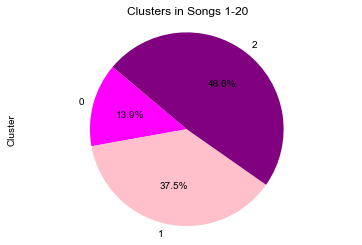

In [6]:
top_20.Cluster.groupby(top_20.Cluster).count().plot(kind='pie', title=("Clusters in Songs 1-20"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
# plt.savefig("Images/songs1-20.png")
sns.set_theme()
plt.show()

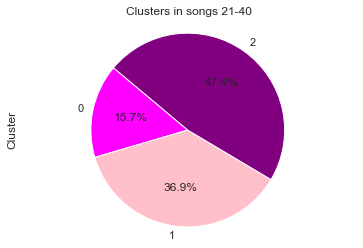

In [7]:
top_40.Cluster.groupby(top_40.Cluster).count().plot(kind='pie', title=("Clusters in songs 21-40"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
# plt.savefig("Images/songs21-40.png")
sns.set_theme()
plt.show()

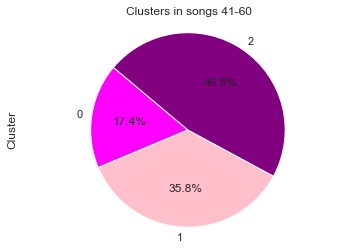

In [8]:
top_60.Cluster.groupby(top_60.Cluster).count().plot(kind='pie', title=("Clusters in songs 41-60"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
# plt.savefig("Images/songs41-60.png")
sns.set_theme()
plt.show()

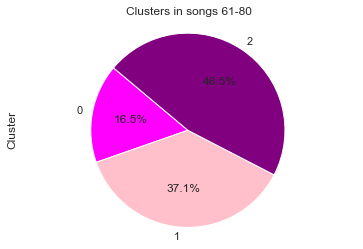

In [9]:
top_80.Cluster.groupby(top_80.Cluster).count().plot(kind='pie', title=("Clusters in songs 61-80"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
# plt.savefig("Images/songs61-80.png")
sns.set_theme()
plt.show()

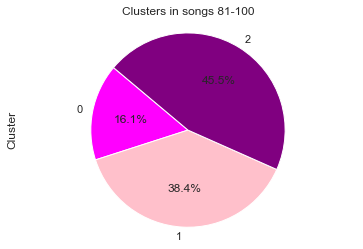

In [10]:
top_100.Cluster.groupby(top_100.Cluster).count().plot(kind='pie', title=("Clusters in songs 81-100"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
# plt.savefig("Images/songs81-100.png")
sns.set_theme()
plt.show()

0 energy
1 key


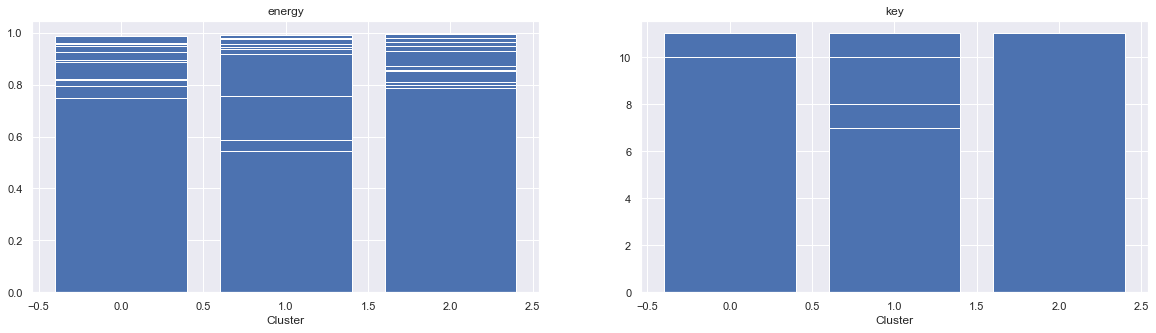

In [21]:
columns = list(top_20.columns)
columns.remove('Cluster')
columns.remove('Placement')

columns = ["energy", "key"]

fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    print(idx, col)
    ax[idx].bar(top_20['Cluster'], top_20[col])
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)

# plt.savefig("Images/scattersongs1-20.png")
plt.show()

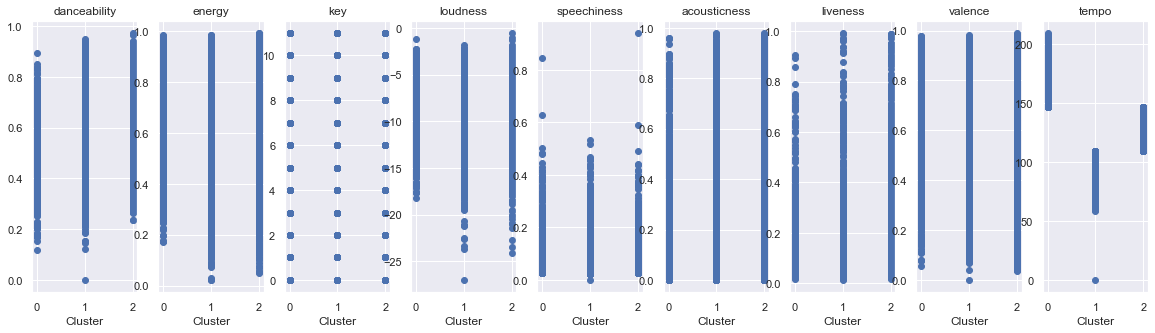

In [12]:
columns = list(top_40.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_40['Cluster'], top_40[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)

# plt.savefig("Images/scattersongs21-40.png")
plt.show()

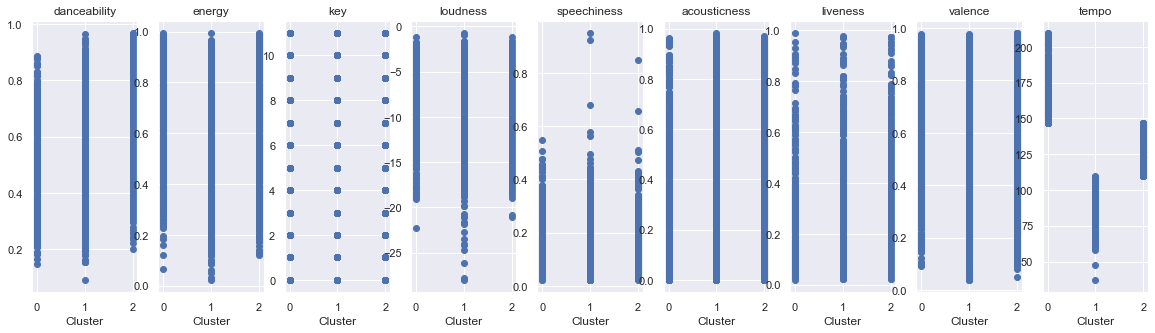

In [13]:
columns = list(top_60.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_60['Cluster'], top_60[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)
    
# plt.savefig("Images/scattersongs41-60.png")
plt.show()

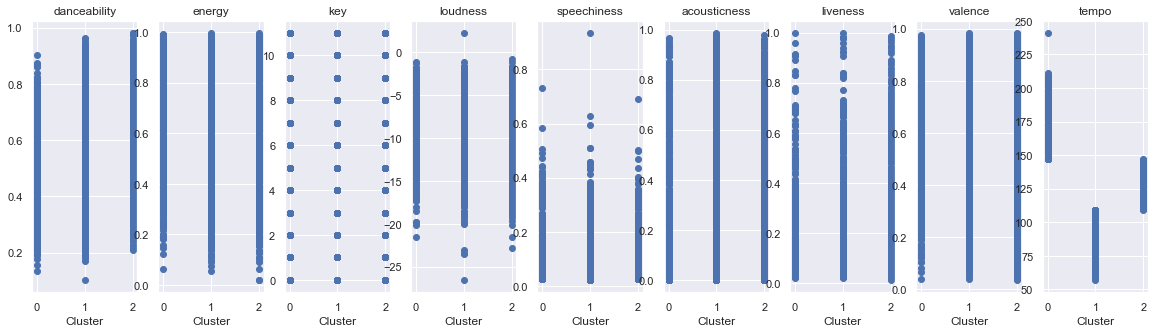

In [14]:
columns = list(top_80.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_80['Cluster'], top_80[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)

# plt.savefig("Images/scattersongs61-80.png")
plt.show()

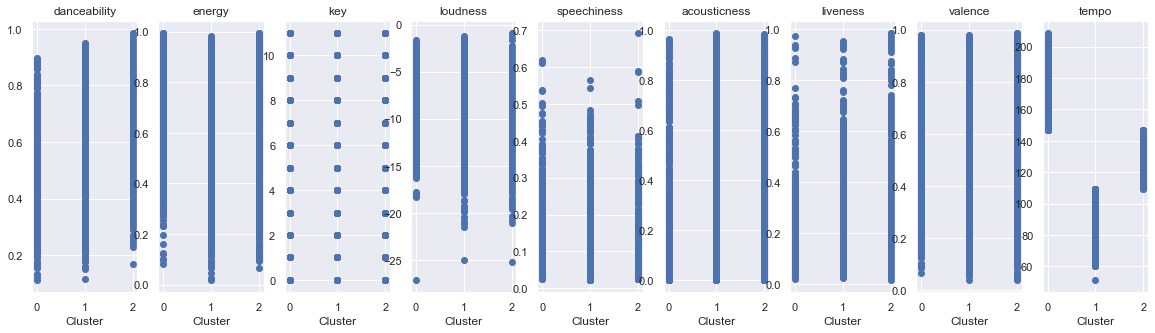

In [15]:
columns = list(top_100.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_100['Cluster'], top_100[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)
    
# plt.savefig("Images/scattersongs81-100.png")
plt.show()

# Aaron's 

In [38]:
def get_rank(row):
    placement = row["Placement"]
    if placement < 20:
        return "Top 20"
    elif placement < 40:
        return "Top 40"
    elif placement < 60:
        return "Top 60"
    elif placement < 80:
        return "Top 80"
    else:
        return "Top 100"
attribute_df["Rank"] = attribute_df.apply(get_rank, axis = 1)
attribute_df.head()

C:\Users\wollm\anaconda3\envs\PythonML\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Placement,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Rank
0,1,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1,Top 20
4,2,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1,Top 20
7,3,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,2,Top 20
14,6,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,0,Top 20
16,7,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,2,Top 20


In [56]:
rank_gb = attribute_df.groupby(["Rank", "Cluster"])
count_df = rank_gb.count()
count_df = count_df.reindex(["Top 20", "Top 40", "Top 60", "Top 80", "Top 100"], level="Rank")
count_df

Placement  danceability  energy   key  loudness  speechiness  \
Rank    Cluster                                                                 
Top 20  0              792           792     792   792       792          792   
        1             2138          2138    2138  2138      2138         2138   
        2             2771          2771    2771  2771      2771         2771   
Top 40  0              587           587     587   587       587          587   
        1             1393          1393    1393  1393      1393         1393   
        2             1789          1789    1789  1789      1789         1789   
Top 60  0              647           647     647   647       647          647   
        1             1312          1312    1312  1312      1312         1312   
        2             1728          1728    1728  1728      1728         1728   
Top 80  0              565           565     565   565       565          565   
        1             1297          1297    1297  1297      1297         1297   
        2             1605          1605    1605  1605      1605         1605   
Top 100 0              551           551     551   551       551          551   
        1             1299          1299    1299  1299      1299         1299   
        2             1561          1561    1561  1561      1561         1561   

                 acousticness  liveness  valence  tempo  
Rank    Cluster                                          
Top 20  0                 792       792      792    792  
        1                2138      2138     2138   2138  
        2                2771      2771     2771   2771  
Top 40  0                 587       587      587    587  
        1                1393      1393     1393   1393  
        2                1789      1789     1789   1789  
Top 60  0                 647       647      647    647  
        1                1312      1312     1312   1312  
        2                1728      1728     1728   1728  
Top 80  0                 565       565      565    565  
        1                1297      1297     1297   1297  
        2                1605      1605     1605   1605  
Top 100 0                 551       551      551    551  
        1                1299      1299     1299   1299  
        2                1561      1561     1561   1561

In [67]:
rank_gb["energy"].describe()

count      mean       std     min      25%    50%      75%  \
Rank    Cluster                                                                
Top 100 0         551.0  0.657448  0.193407  0.0801  0.52300  0.677  0.81250   
        1        1299.0  0.580131  0.209083  0.0181  0.41850  0.598  0.74750   
        2        1561.0  0.643051  0.198663  0.0645  0.50100  0.663  0.80400   
Top 20  0         792.0  0.646544  0.191677  0.0427  0.51325  0.675  0.80000   
        1        2138.0  0.576290  0.197586  0.0210  0.43500  0.580  0.72775   
        2        2771.0  0.639689  0.187340  0.0204  0.50500  0.655  0.78750   
Top 40  0         587.0  0.659039  0.187314  0.1710  0.52450  0.681  0.81700   
        1        1393.0  0.590175  0.202989  0.0220  0.43900  0.605  0.74500   
        2        1789.0  0.641279  0.196176  0.0480  0.51000  0.657  0.80200   
Top 60  0         647.0  0.663098  0.185480  0.0645  0.53750  0.679  0.81300   
        1        1312.0  0.582581  0.201361  0.0227  0.43400  0.599  0.74125   
        2        1728.0  0.651006  0.190050  0.0551  0.51100  0.668  0.80625   
Top 80  0         565.0  0.656807  0.200849  0.0622  0.51400  0.697  0.80900   
        1        1297.0  0.593660  0.202228  0.0561  0.44800  0.599  0.75600   
        2        1605.0  0.650989  0.191601  0.0206  0.51500  0.671  0.80400   

                   max  
Rank    Cluster         
Top 100 0        0.995  
        1        0.984  
        2        0.995  
Top 20  0        0.986  
        1        0.991  
        2        0.994  
Top 40  0        0.985  
        1        0.984  
        2        0.997  
Top 60  0        0.995  
        1        0.993  
        2        0.995  
Top 80  0        0.988  
        1        0.996  
        2        0.983

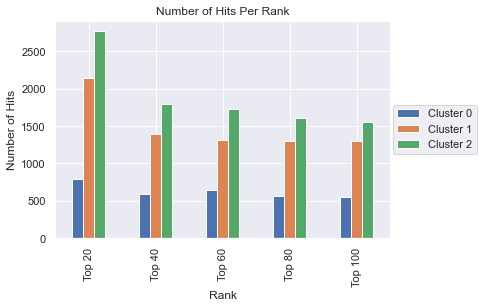

In [57]:
axis = count_df[["energy"]].unstack('Cluster').plot(kind="bar", title = "Number of Hits Per Rank")
axis.set_ylabel("Number of Hits")
axis.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='center right', bbox_to_anchor=(1.275, .5))
plt.show()

In [64]:
mean_df = rank_gb.median()
mean_df = mean_df.reindex(["Top 20", "Top 40", "Top 60", "Top 80", "Top 100"], level="Rank")
mean_df

Placement  danceability  energy  key  loudness  speechiness  \
Rank    Cluster                                                                
Top 20  0                9         0.517   0.675  5.0   -7.8300       0.0469   
        1                8         0.631   0.580  5.0   -8.6420       0.0403   
        2                8         0.652   0.655  5.0   -8.2760       0.0387   
Top 40  0               30         0.500   0.681  5.0   -7.3630       0.0465   
        1               29         0.610   0.605  6.0   -8.3330       0.0376   
        2               29         0.625   0.657  5.0   -8.3420       0.0385   
Top 60  0               50         0.492   0.679  5.0   -7.2270       0.0480   
        1               50         0.607   0.599  5.0   -8.4865       0.0385   
        2               49         0.629   0.668  5.5   -8.3510       0.0395   
Top 80  0               69         0.488   0.697  5.0   -7.5120       0.0507   
        1               70         0.612   0.599  5.0   -8.4350       0.0398   
        2               69         0.635   0.671  5.0   -8.2140       0.0411   
Top 100 0               90         0.496   0.677  5.0   -7.0890       0.0561   
        1               90         0.601   0.598  5.0   -8.6370       0.0385   
        2               90         0.634   0.663  6.0   -8.5190       0.0410   

                 acousticness  liveness  valence     tempo  
Rank    Cluster                                             
Top 20  0               0.198    0.1305    0.640  166.0260  
        1               0.226    0.1240    0.597   95.1025  
        2               0.170    0.1260    0.697  125.0140  
Top 40  0               0.158    0.1450    0.662  166.2410  
        1               0.243    0.1280    0.596   95.0760  
        2               0.161    0.1350    0.662  125.1560  
Top 60  0               0.166    0.1390    0.598  165.7030  
        1               0.216    0.1290    0.582   94.7885  
        2               0.135    0.1340    0.677  125.8140  
Top 80  0               0.159    0.1430    0.602  165.8130  
        1               0.221    0.1280    0.599   94.8360  
        2               0.131    0.1310    0.667  125.6420  
Top 100 0               0.166    0.1360    0.593  166.1030  
        1               0.262    0.1350    0.576   94.0000  
        2               0.155    0.1280    0.668  125.1200

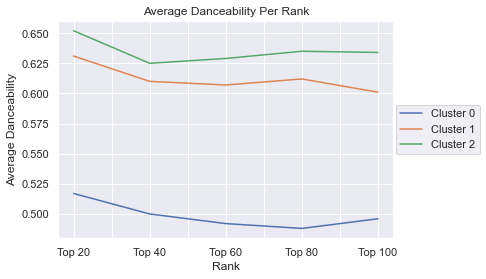

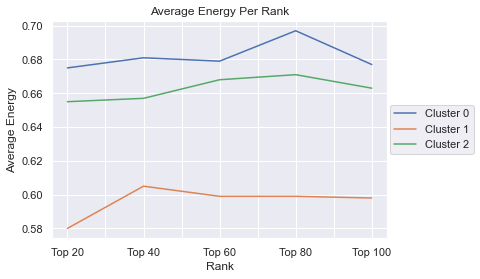

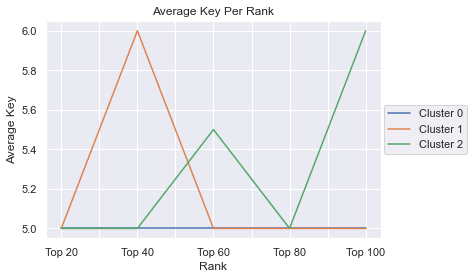

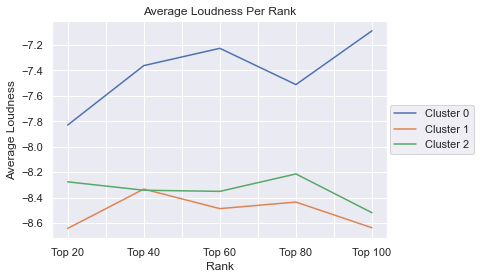

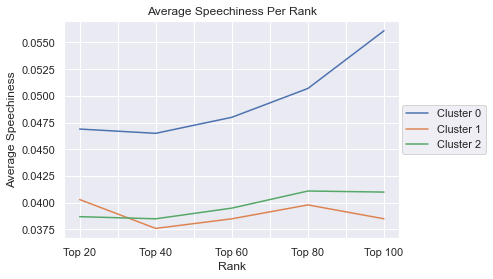

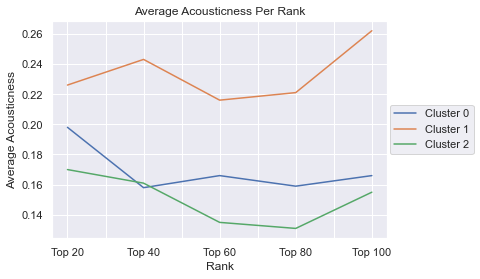

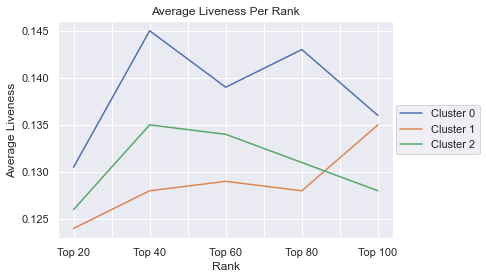

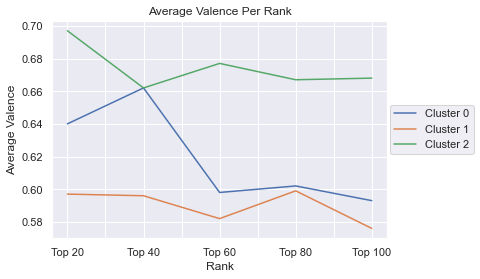

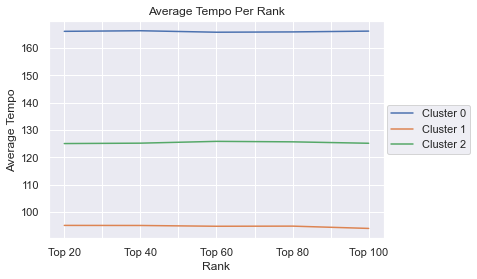

In [70]:
columns = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "speechiness",
    "acousticness",
    "liveness",
    "valence",
    "tempo"
]
for column in columns:
    axis = mean_df[[column]].unstack('Cluster').plot(kind="line", title = f"Average {column.capitalize()} Per Rank")
    axis.set_ylabel(f"Average {column.capitalize()}")
    axis.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='center right', bbox_to_anchor=(1.275, .5))
    plt.show()

# END TEST